# Хайкова Светлана
## Вариант 25
### 5.1.25, 5.4.5, 5.5.13, 5.8.4

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from IPython.display import Image

# Задача 5.1.25

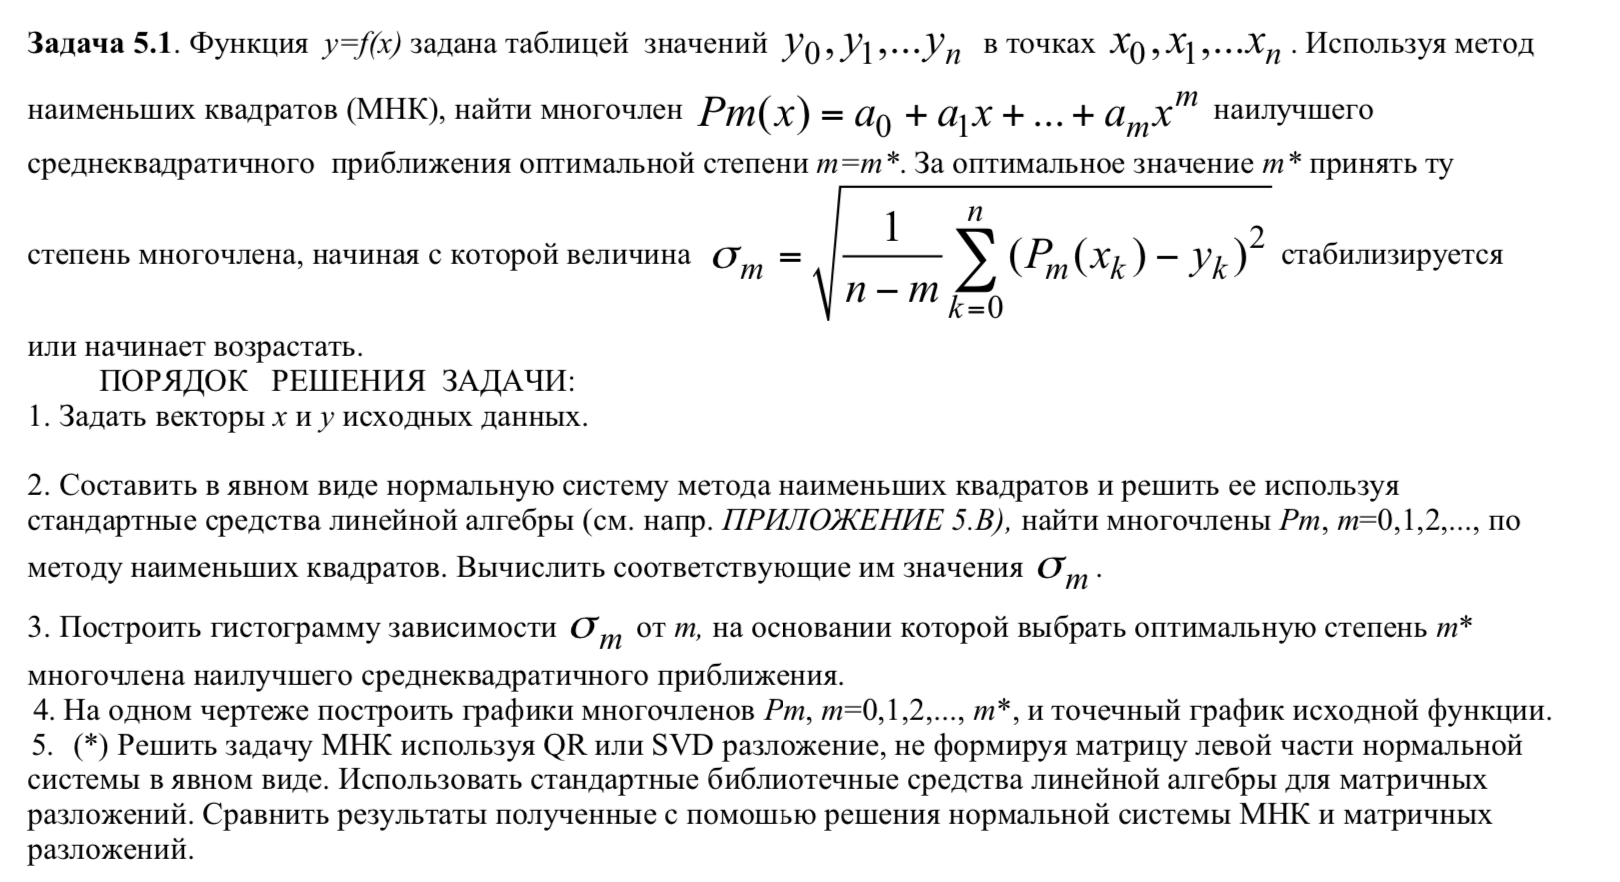

In [2]:
Image("LR5_1.png")

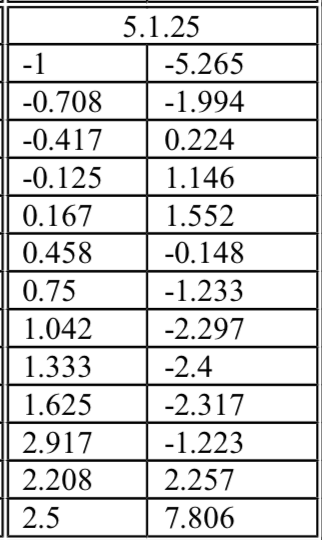

In [3]:
Image("LR5_1_var.png")

### 1. Задать векторы x и y исходных данных.

In [4]:
X = np.array([-1, -0.708, -0.417, -0.125, 0.167, 0.458, 0.75, 1.042, 1.333, 1.625, 2.917, 2.208, 2.5])
Y = np.array([5.265, -1.994, 0.224, 1.146, 1.552, -0.148, -1.233, -2.297, -2.4, -2.317, -1.223, 2.257, 7.806])

### 2. Составить в явном виде нормальную систему метода наименьших квадратов и решить ее используя стандартные средства линейной алгебры, найти многочлены $P_m$, m=0,1,2,..., по методу наименьших квадратов. Вычислить соответствующие им значения $σ_m$.

In [5]:
def mnk(X, Y, m):
    ''' Функция находит разложение функции по базисным векторам 
    (векторам x^j, где j = 1, ... m) методом наименьших квадратов
    Входные параметры:
    X, Y - векторы исходных данных
    m - степень многочлена
    
    Возвращаемые значения:
    Массив коэффициентов разложения функции по базисным векторам'''
    A = np.array([[x**j for j in range(m + 1)] for x in X])
    return npl.solve(A.T.dot(A), A.T.dot(Y))

def getPolynomPoint(X, w):
    ''' Функция возвращает значение полинома с коэффициентами w в точке x'''
    return [np.sum(x**np.arange(len(w)) * w) for x in X]

def sigma(x, y, W):
    ''' Находит $\sigma_m$, где m - степень многочлена
    Входные параметры:
    x, y - векторы исходных даных
    w - коэффициенты полинома
    
    Возвращаемые значения:
    $\sigma_m$
    '''
    return [np.sum((getPolynomPoint(x, w) - y)**2) / (x.shape[0] - w.shape[0]) for w in W]

M = np.arange(11)
sigmas = sigma(X, Y, [mnk(X, Y, m) for m in M])
sigmas

[9.795774756410259,
 10.67858801857668,
 9.328008207074982,
 9.839452750522408,
 9.486806153006604,
 1.4670704033008455,
 1.7096081198549218,
 0.11644711018921317,
 0.1178728916678575,
 0.10826587442283563,
 0.10608958856521378]

### 3. Построить гистограмму зависимости $σ_m$ от m, на основании которой выбрать оптимальную степень m многочлена наилучшего среднеквадратичного приближения.

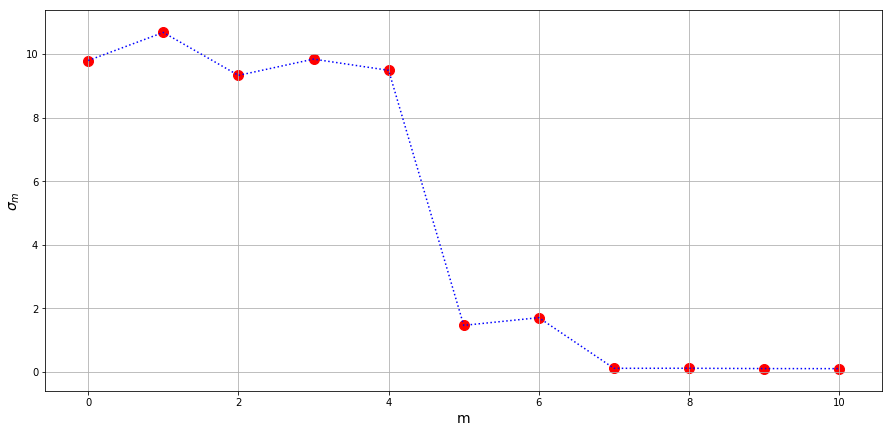

In [6]:
plt.figure(figsize = (15, 7))
plt.plot(M, sigmas, color= 'blue', ls = ':')
plt.scatter(M, sigmas, color = 'red', s = 100)
plt.xlabel('m', fontsize = 14)
plt.ylabel('$\sigma_m$', fontsize = 14);
plt.grid()

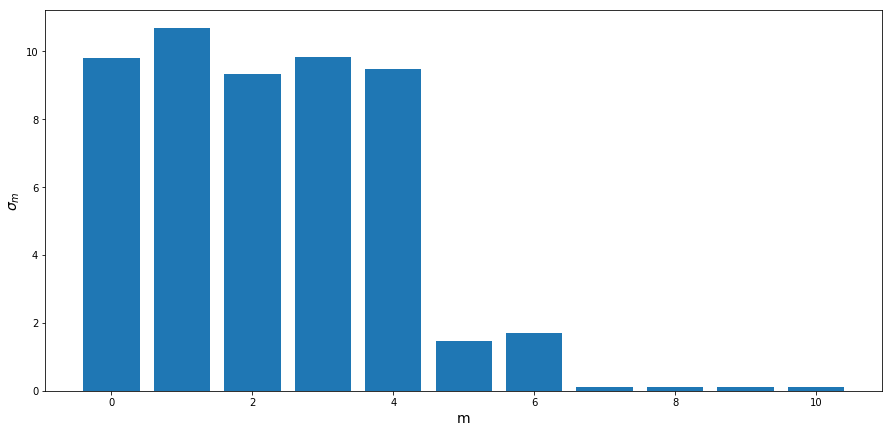

In [7]:
plt.figure(figsize = (15, 7))
plt.bar(M, sigmas)
plt.xlabel('m', fontsize = 14)
plt.ylabel('$\sigma_m$', fontsize = 14);

Сигма перестает убывать и стабилизируется при m = 7

### 4. На одном чертеже построить графики многочленов $P_m$, m=0,1,2,..., m, и точечный график исходной функции.

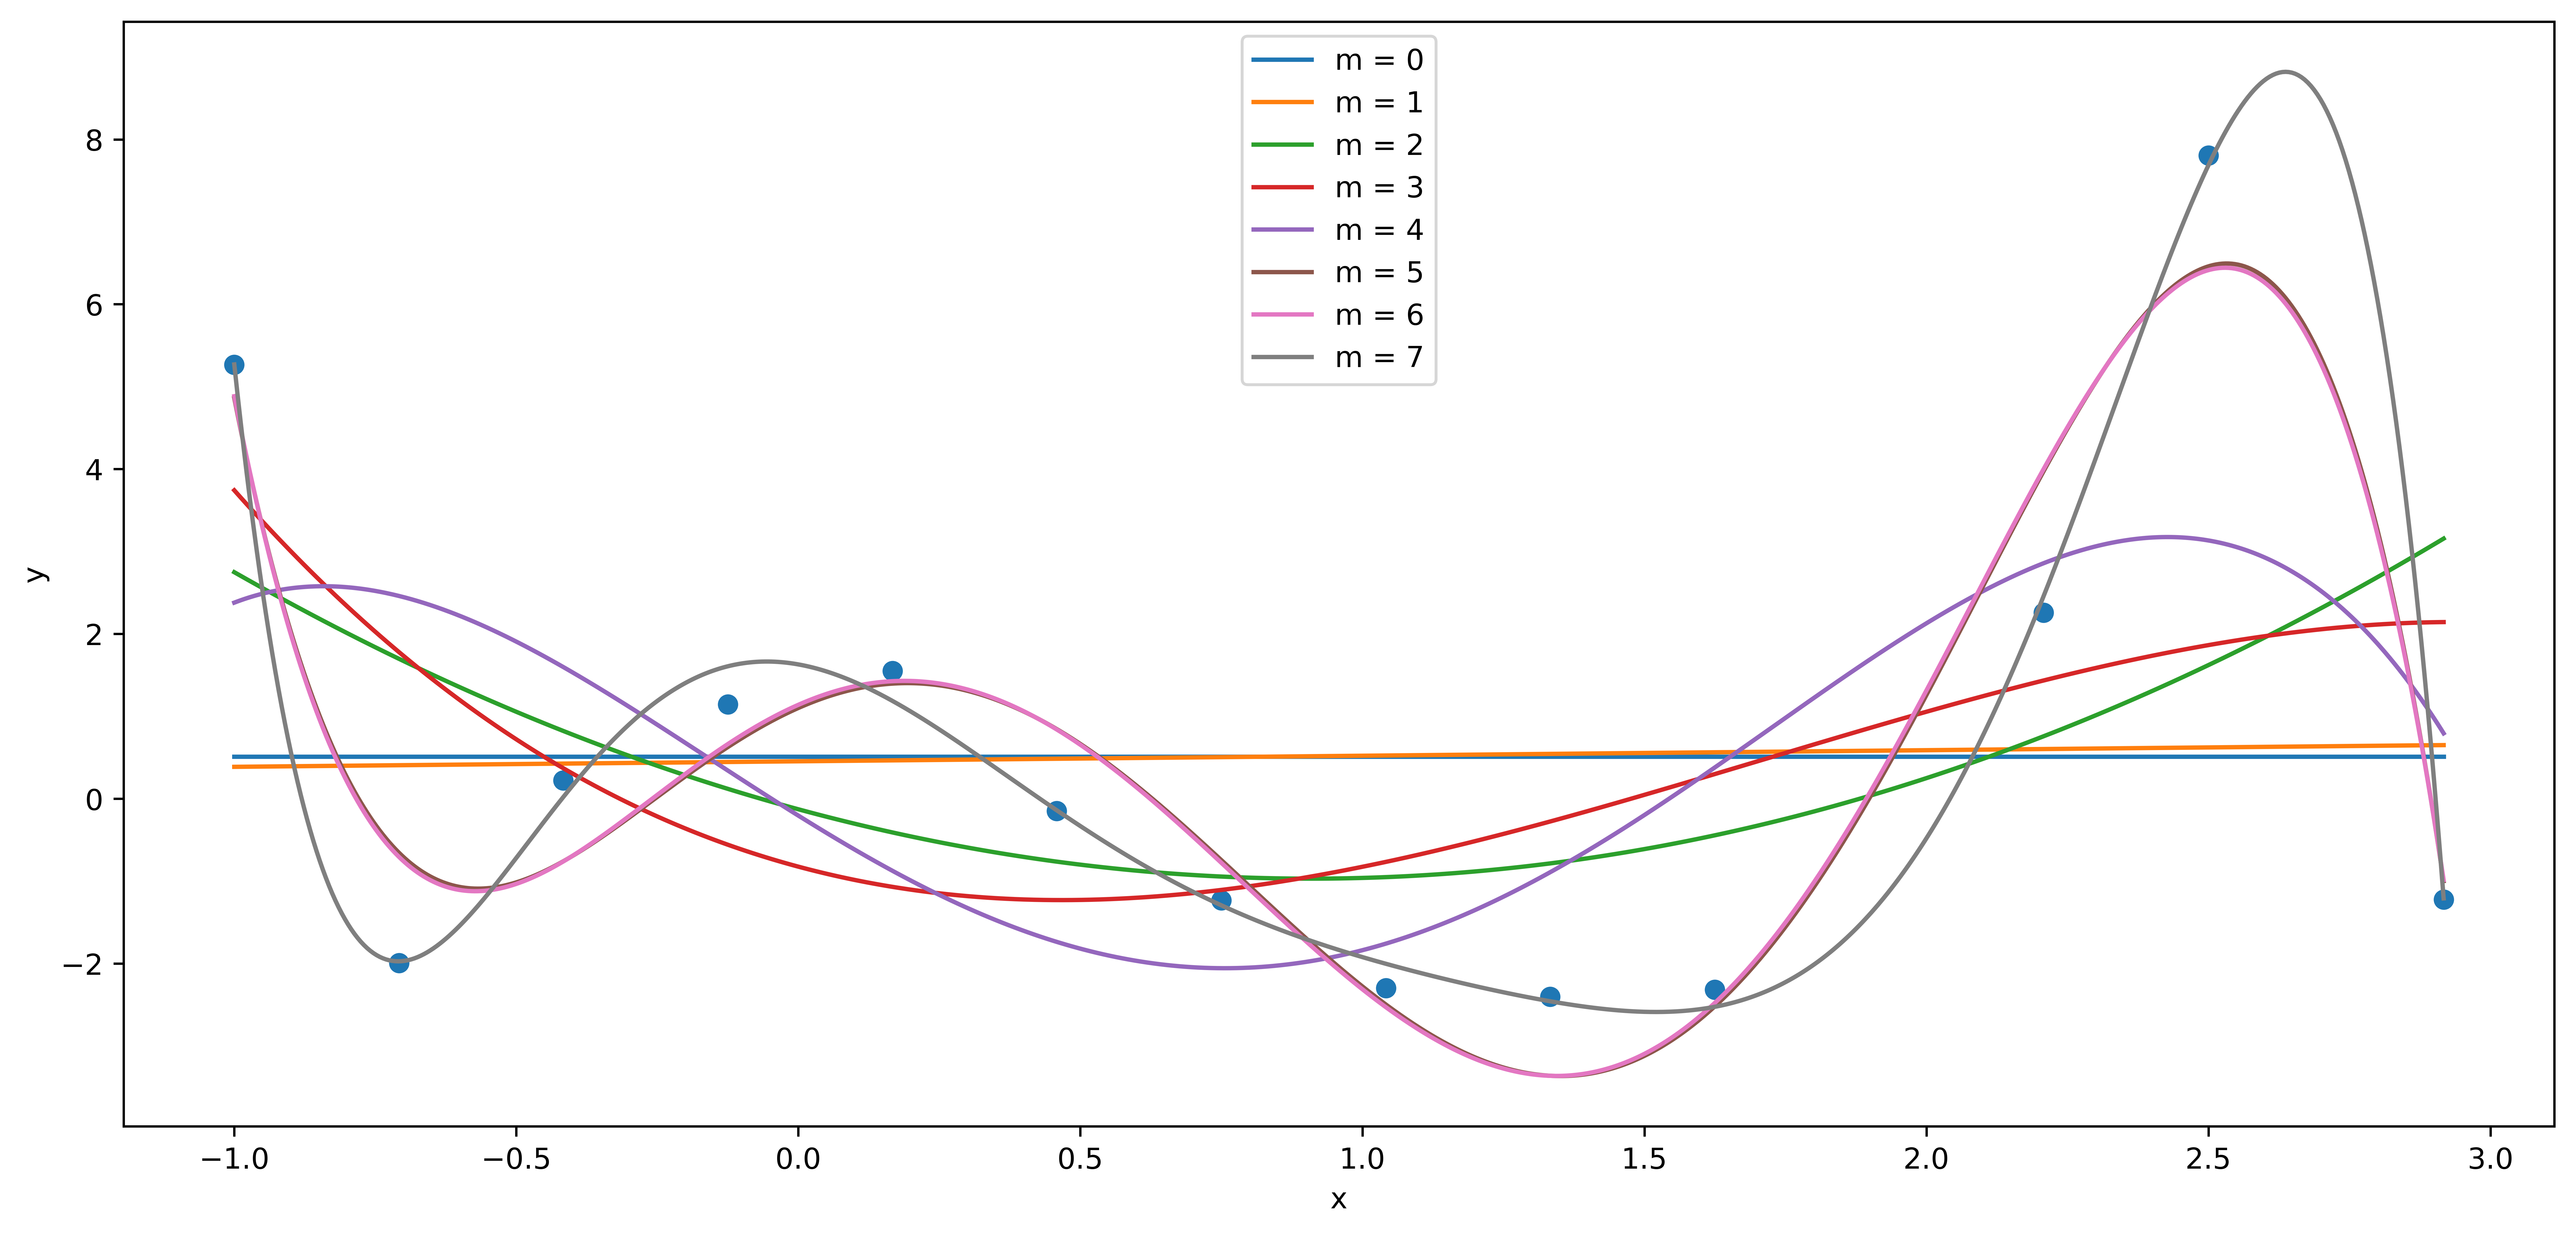

In [8]:
plt.figure(figsize = (15, 7), dpi = 800)
plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')

x_test = np.linspace(min(X), max(X), 700)
for m in range(7 + 1):
    y_test = getPolynomPoint(x_test, mnk(X, Y, m))
    plt.plot(x_test, y_test, label = 'm = ' + str(m))
plt.legend()

### 5. (*) Решить задачу МНК используя QR или SVD разложение, не формируя матрицу левой части нормальной системы в явном виде. Использовать стандартные библиотечные средства линейной алгебры для матричных разложений. Сравнить результаты полученные с помошью решения нормальной системы МНК и матричных разложений.

In [9]:
import scipy.linalg as spl

In [10]:
def mnk_QR(X, Y, m):
    ''' Функция находит разложение функции по базисным векторам 
    (векторам x^j, где j = 1, ... m) методом наименьших квадратов с помощью QR-разложения
    Входные параметры:
    X, Y - векторы исходных данных
    m - степень многочлена
    
    Возвращаемые значения:
    Массив коэффициентов разложения функции по базисным векторам'''
    A = np.array([[x**j for j in range(m + 1)] for x in X])
    Q, R = np.linalg.qr(A)
    return spl.solve_triangular(R, Q.T.dot(Y))

np.allclose(mnk(X, Y, 2), mnk_QR(X, Y, 2))

True

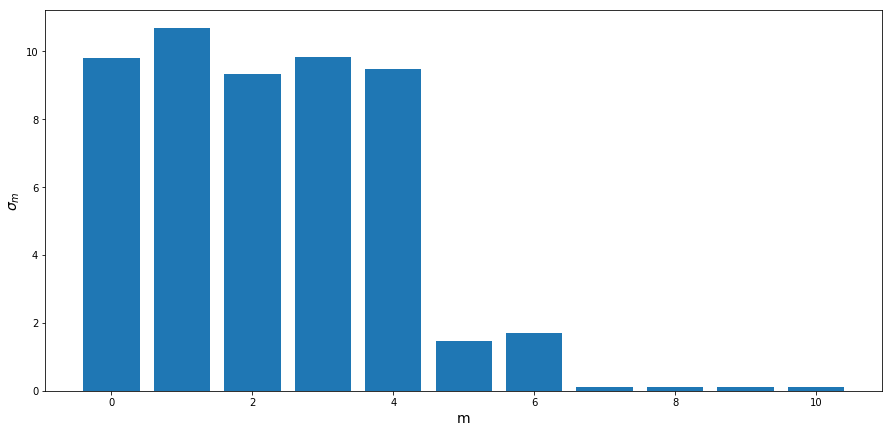

In [11]:
sigmas_QR = sigma(X, Y, [mnk_QR(X, Y, m) for m in M])

plt.figure(figsize = (15, 7))
plt.bar(M, sigmas_QR)
plt.xlabel('m', fontsize = 14)
plt.ylabel('$\sigma_m$', fontsize = 14);

 # Задача 5.4.5

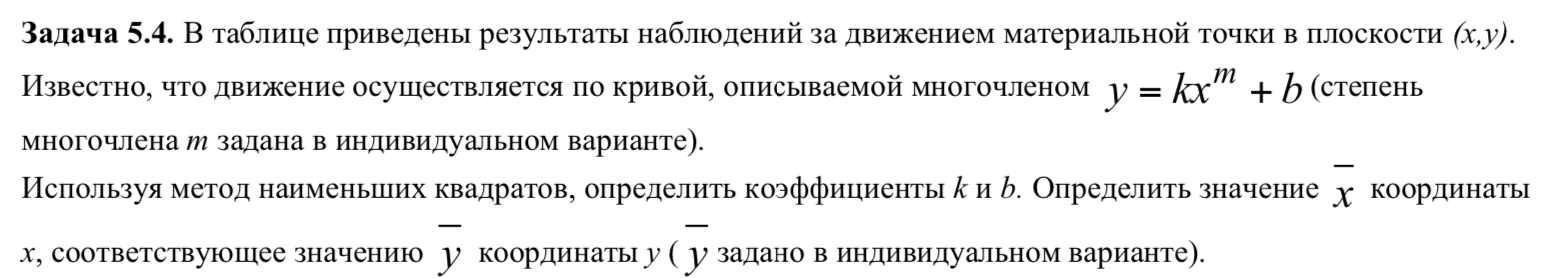

In [12]:
Image("LR5_4.png")

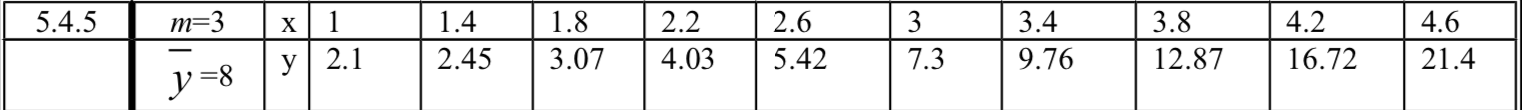

In [13]:
Image("LR5_4_var.png")

### Зададим полезненькую еще и для следующего задания функцию

In [14]:
def mnk_phi(X, Y, phis):
    ''' Функция находит разложение функции по базисным векторам методом наименьших квадратов
    Входные параметры:
    X, Y - векторы исходных данных
    phis - список базисных функций, по которым ищем разложение
    
    Возвращаемые значения:
    Массив коэффициентов разложения функции по базисным векторам'''
    A = np.array([[phi(x) for phi in phis] for x in X])
    return npl.solve(A.T.dot(A), A.T.dot(Y))

### Зададим исходные данные

In [15]:
m = 3

def phi1(x):
    return x**m

def phi2(x):
    return 1

X = np.array([1, 1.4, 1.8, 2.2, 2.6, 3, 3.4, 3.8, 4.2, 4.6])
Y = np.array([2.1, 2.45, 3.07, 4.03, 5.42, 7.3, 9.76, 12.87, 16.72, 21.4])
print X.shape, Y.shape

(10,) (10,)


### Найдем коэффициенты 

In [16]:
coef = mnk_phi(X, Y, [phi1, phi2])
print coef

[0.20019281 1.89762955]


### Теперь найдем значение x при y = 8

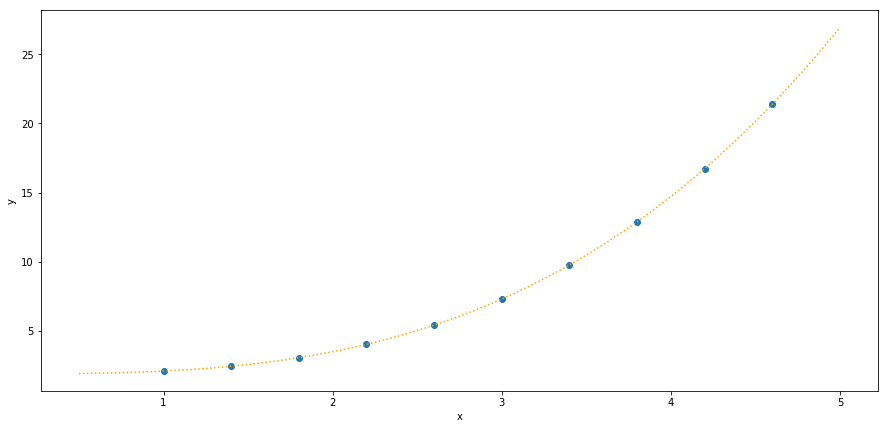

In [17]:
plt.figure(figsize = (15, 7))

plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')
x_test = np.linspace(0.5, 5, 700)
plt.plot(x_test, coef[0] * phi1(x_test) + coef[1] * phi2(x_test), color = 'orange', ls = ':')

In [18]:
# это мы решили заодно заюзать биссекцию, ибо сначала нам показалось, что извлекать корни может быть не очень классно
l = 0
r = 4
y = 8
eps = 1e-15
while l + eps < r:
    mid = (l + r) / 2.
    midF = coef[0] * phi1(mid) + coef[1] * phi2(mid)
    if midF >= y:
        r = mid
    else:
        l = mid
m = 3
r, coef[0] * r**m + coef[1]

(3.12380103234117, 8.000000000000002)

In [19]:
x3 = (- coef[1] + y) / coef[0]
x = x3**(1. / 3)
x, coef[0] * phi1(x) + coef[1] * phi2(x)

(3.1238010323411696, 8.0)

In [20]:
print x

3.1238010323411696


# Задача 5.5.13

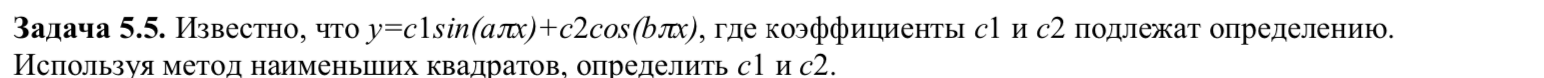

In [21]:
# в общем, я видимо слепая, но я не нашла вариантов дальше 8
# поэтому тут взят 5 вариант (13 - 8)
Image("LR5_5.png")

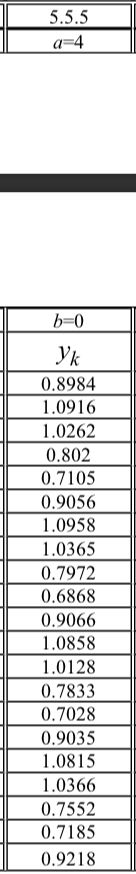

In [22]:
Image("LR5_5_var.png")

### Зададим исходные данные

In [23]:
def phi1(x):
    a=4
    return np.sin(a*np.pi*x)

def phi2(x):
    b=0
    return np.cos(b*np.pi*x)

In [24]:
X = np.array([-1 + 0.1 * k for k in range(0, 20 + 1)])
Y = np.array([0.8984, 1.0916, 1.0262, 0.802, 0.7105, 0.9056, 1.0958, 1.0365, 0.7972, 0.6868, 0.9066, 1.0858, 1.0128, 0.7833, 0.7028, 0.9035, 1.0815, 1.0366, 0.7552, 0.7185, 0.9218])

### Найдем коэффициенты и построим график

[0.20336559 0.90280952]


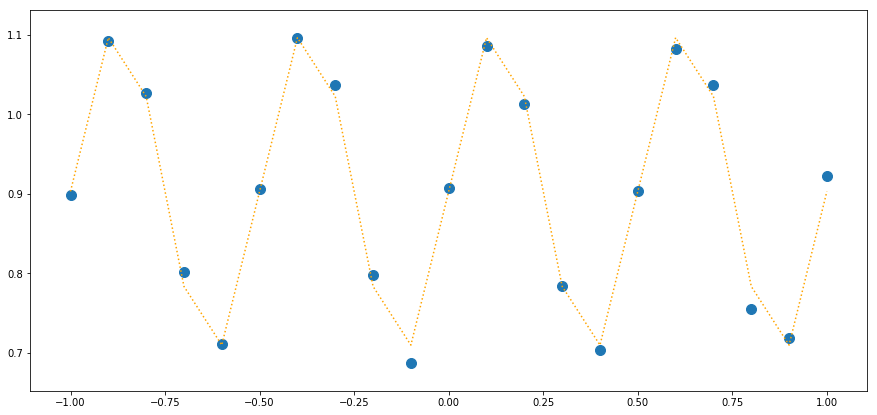

In [25]:
coef = mnk_phi(X,Y,[phi1, phi2])
print coef

plt.figure(figsize = (15, 7))
plt.scatter(X, Y, s = 100)
plt.plot(X, coef[0] * phi1(X) + coef[1] * phi2(X), color = 'orange', ls = ':')

# Задача 5.8.4

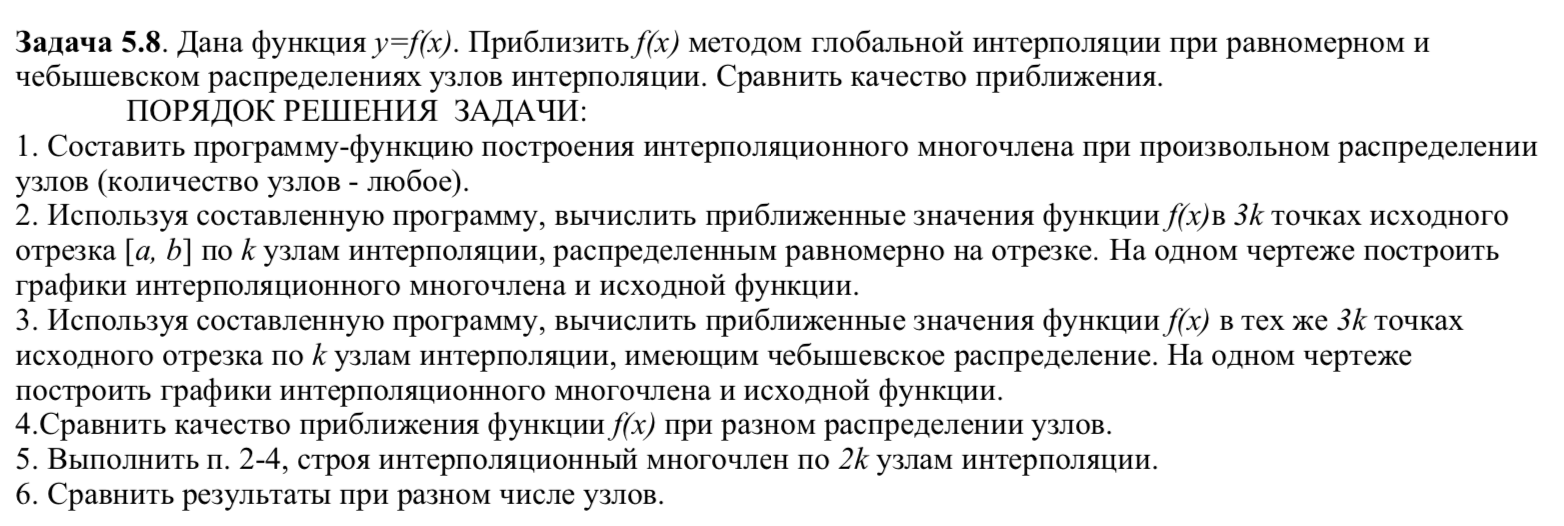

In [26]:
Image("LR5_8.png")

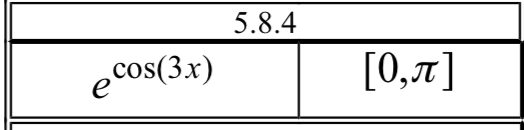

In [27]:
Image("LR5_8_var.png")

### Зададим исходные данные

In [28]:
def f(x):
    return np.exp(np.cos(3 * x))
a = 0
b = np.pi

k = 21 # взяли рандомное k

### Теперь возьмем все эти магические точки и функции от них

In [43]:
## 3k
X = np.linspace(a, b, 3 * k)
Y = f(X)

## k
Xuni = np.linspace(a, b, k)
Yuni = f(Xuni)
Xcheb = np.array([np.cos((2 * i + 1) / (2. * k) * np.pi) for i in range(k)]) * (b - a) * 0.5 + (b + a) * 0.5
Ycheb = f(Xcheb)

### Зададим полином Лагранжа и построим его

In [44]:
def L_k(k, x, X):
    return np.prod([(x - Xj) / (X[k] - Xj) for Xj in X if X[k] - Xj != 0])

def lagr_poly(x, X, Y):
    ''' Функция получает значение полинома Лагранжа в точке x
    Входные параметры:
    x - точка, в которой считаем значения
    X, Y - данные, на которых строится полином
    
    Возвращаемое значение:
    Значение полинома Лагранжа в точке x'''
    return np.sum ([Y[k] * L_k(k, x, X) for k in range(Y.shape[0])])

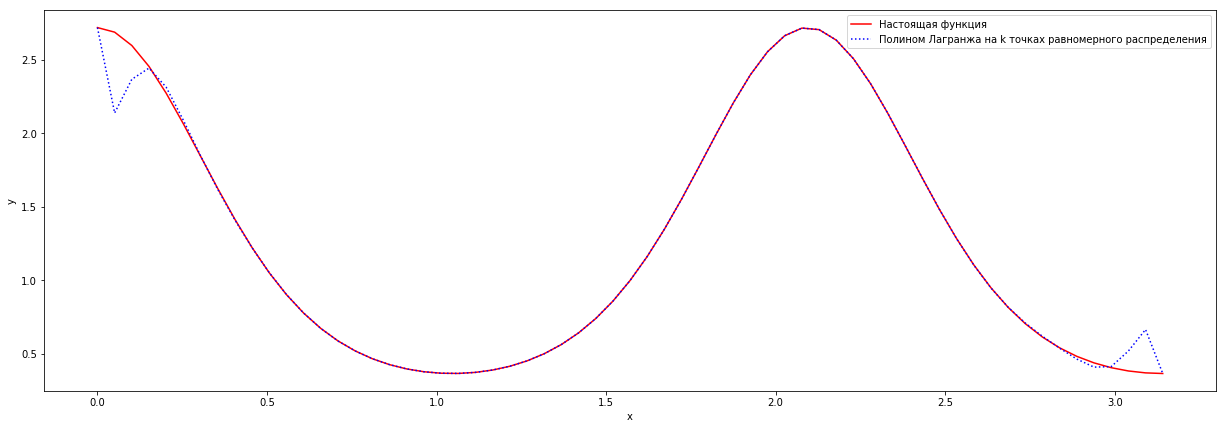

In [45]:
plt.figure(figsize = (21, 7))

plt.plot(X, Y, label = u'Настоящая функция', color = 'red')
lagrY = [lagr_poly(x, Xuni, Yuni) for x in X]
plt.plot(X, lagrY, label = u'Полином Лагранжа на k точках равномерного распределения', ls = ':', color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [46]:
print 'Ошибка полинома Лагранжа на k точках равномерного распределения:', np.max(np.abs(Y - lagrY))

Ошибка полинома Лагранжа на k точках равномерного распределения: 0.5491518100874391


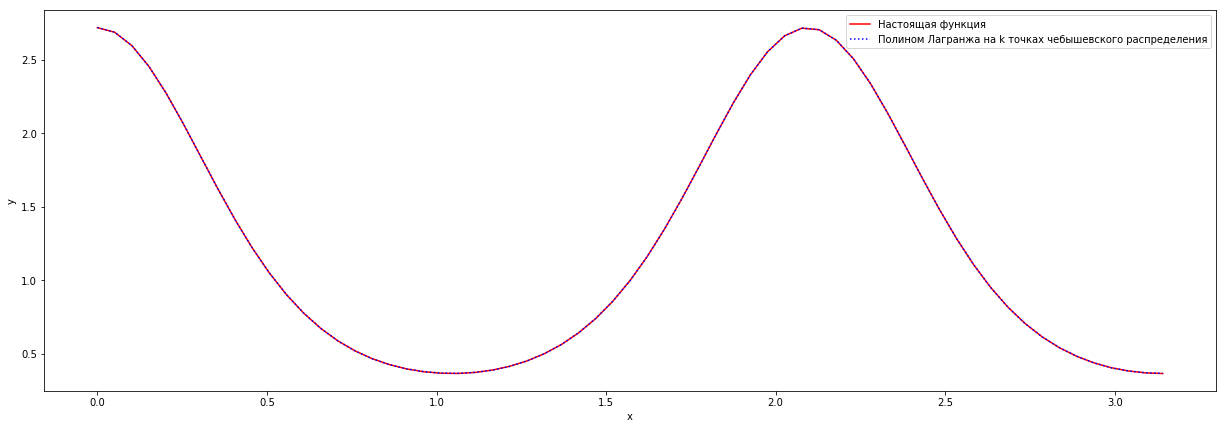

In [47]:
plt.figure(figsize = (21, 7))
plt.plot(X, Y, label = u'Настоящая функция', color = 'red')
lagrY = [lagr_poly(x, Xcheb, Ycheb) for x in X]
plt.plot(X, lagrY, label = u'Полином Лагранжа на k точках чебышевского распределения', ls = ':', color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [48]:
print 'Ошибка полинома Лагранжа на k точках чебышевского распределения:', np.max(np.abs(Y - lagrY))

Ошибка полинома Лагранжа на k точках чебышевского распределения: 0.0008363042817992605


### Повторим тоже самое для 2k точек

In [49]:
## 2k
X = np.linspace(a, b, 2 * k)
Y = f(X)

## k
Xuni = np.linspace(a, b, k)
Yuni = f(Xuni)
Xcheb = np.array([np.cos((2 * i + 1) / (2. * k) * np.pi) for i in range(k)]) * (b - a) * 0.5 + (b + a) * 0.5
Ycheb = f(Xcheb)

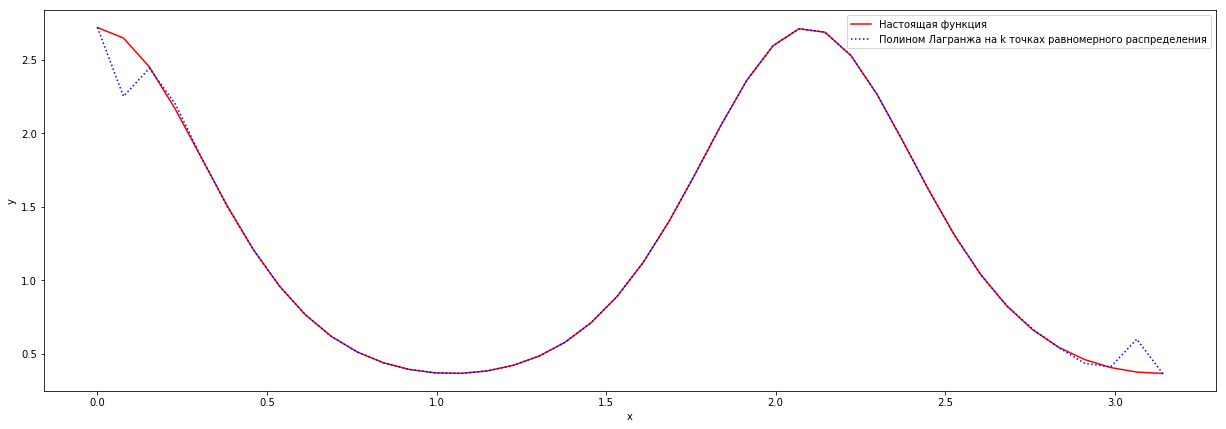

In [50]:
plt.figure(figsize = (21, 7))
plt.plot(X, Y, label = u'Настоящая функция', color = 'red')
lagrY = [lagr_poly(x, Xuni, Yuni) for x in X]
plt.plot(X, lagrY, label = u'Полином Лагранжа на k точках равномерного распределения', ls = ':', color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [51]:
print 'Ошибка полинома Лагранжа на k точках равномерного распределения:', np.max(np.abs(Y - lagrY))

Ошибка полинома Лагранжа на k точках равномерного распределения: 0.3964813230481048


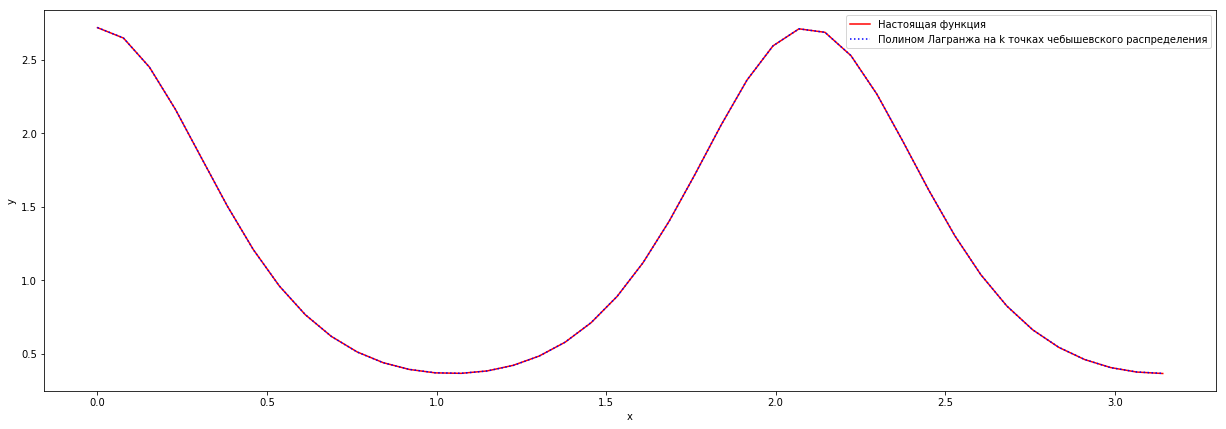

In [52]:
plt.figure(figsize = (21, 7))
plt.plot(X, Y, label = u'Настоящая функция', color = 'red')
lagrY = [lagr_poly(x, Xcheb, Ycheb) for x in X]
plt.plot(X, lagrY, label = u'Полином Лагранжа на k точках чебышевского распределения', ls = ':', color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [53]:
print 'Ошибка полинома Лагранжа на k точках чебышевского распределения:', np.max(np.abs(Y - lagrY))

Ошибка полинома Лагранжа на k точках чебышевского распределения: 0.000838337342740858


В общем, если количество точек будет 2k, то равномерное распределение дает точность лучше, чем аналогичное при 3k точках

Чебышевское дает точность замеееетно выше, чем равномерное и оно почти одинаково для случаев 2 и 3 k

Но вообще ошибка равномерного идет только на концах